In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
from keras.layers import Dense, Dropout, Input, Flatten, Model
from keras.optimizers import Adam

In [ ]:
# Set the paths to your dataset
base_dir = 'face_croped/'
train_dir = base_dir + 'train/'
validation_dir = base_dir + 'val/'
test_dir = base_dir + 'test/'

In [ ]:
# Set some parameters
batch_size = 32
img_size = (224, 224)

In [ ]:
# Data generators with preprocessing
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

In [ ]:
val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [ ]:
# Flow training images in batches
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=img_size,
                                                    batch_size=batch_size,
                                                    class_mode='binary')

# Flow validation images in batches
validation_generator = val_datagen.flow_from_directory(validation_dir,
                                                       target_size=img_size,
                                                       batch_size=batch_size,
                                                       class_mode='binary')

# Flow test images in batches
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=img_size,
                                                  batch_size=batch_size,
                                                  class_mode='binary')


Found 65928 images belonging to 2 classes.
Found 18837 images belonging to 2 classes.
Found 9419 images belonging to 2 classes.


In [ ]:
mobilenet = MobileNetV2(weights="imagenet",include_top=False,input_tensor=Input(shape=(224,224,3)))
mobilenet.trainable = False

9406464/9406464 [==============================] - 1s 0us/step


In [ ]:
output = Flatten()(mobilenet.output)
output = Dropout(0.3)(output)
output = Dense(units = 8,activation='relu')(output)
prediction = Dense(1,activation='sigmoid')(output)

In [ ]:
model = Model(inputs = mobilenet.input,outputs = prediction)

# Compile the model
# tell the model what cost and optimization method to use
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(
    learning_rate=0.000001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07
),
  metrics=['accuracy']
)

In [ ]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=100,  # You can adjust the number of epochs
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

Epoch 1/150
126/126 [==============================] - 4s 14ms/step - loss: 0.4507 - accuracy: 0.1369 - val_loss: 0.4023 - val_accuracy: 0.1964
Epoch 2/150
126/126 [==============================] - 1s 8ms/step - loss: 0.4109 - accuracy: 0.2019 - val_loss: 0.3733 - val_accuracy: 0.3304
Epoch 3/150
126/126 [==============================] - 1s 8ms/step - loss: 0.3647 - accuracy: 0.3289 - val_loss: 0.3179 - val_accuracy: 0.4509
Epoch 4/150
126/126 [==============================] - 1s 8ms/step - loss: 0.3071 - accuracy: 0.4871 - val_loss: 0.2544 - val_accuracy: 0.6339
Epoch 5/150
126/126 [==============================] - 1s 8ms/step - loss: 0.2568 - accuracy: 0.6314 - val_loss: 0.2238 - val_accuracy: 0.7277
Epoch 6/150
126/126 [==============================] - 1s 8ms/step - loss: 0.2109 - accuracy: 0.7669 - val_loss: 0.1647 - val_accuracy: 0.8527
Epoch 7/150
126/126 [==============================] - 1s 8ms/step - loss: 0.1678 - accuracy: 0.8695 - val_loss: 0.1443 - val_accuracy: 0.892

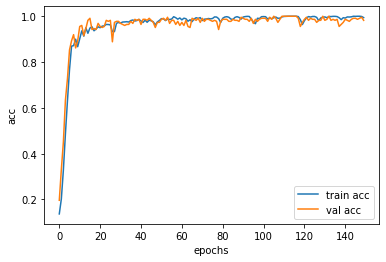

In [ ]:
epochs = list(range(150))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train acc')
plt.plot(epochs, val_acc, label='val acc')
plt.xlabel('epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

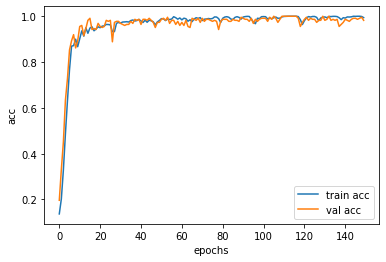

In [ ]:
epochs = list(range(150))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train acc')
plt.plot(epochs, val_acc, label='val acc')
plt.xlabel('epochs')
plt.ylabel('acc')
plt.legend()
plt.show()